# 1. Data colection

In [1]:
# from data.get_data import fetch_mt5_data_between_dates
# import MetaTrader5 as mt5
from datetime import datetime, timedelta

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# ## Get data from trainning
# symbol = 'US500'
# end_date = datetime.now()
# start_date = end_date - timedelta(days=365*10)
# timeframe =timeframe = mt5.TIMEFRAME_M15
# data_signal = fetch_mt5_data_between_dates (symbol, timeframe, start_date, end_date)

In [3]:
# ## Get data from trainning
# symbol = "US500"
# end_date = datetime.now()
# start_date = end_date - timedelta(days=365*3)
# timeframe =timeframe = mt5.TIMEFRAME_H1
# df_1h = fetch_mt5_data_between_dates (symbol, timeframe, start_date, end_date)
# df_1h.head()

In [4]:
df_1h = pd.read_csv('SPY_1h.csv')

In [5]:
df_1h['time'] = pd.to_datetime (df_1h['time'])
df_1h = df_1h.set_index('time')

In [6]:
# df_1h.to_csv('SPY_1h.csv')

In [7]:
# ## Get data from trainning
# symbol = "US500"
# end_date = datetime.now()
# start_date = end_date - timedelta(days=365*3)
# timeframe =timeframe = mt5.TIMEFRAME_H4
# df_4h = fetch_mt5_data_between_dates (symbol, timeframe, start_date, end_date)
# df_4h .head()

In [8]:
df_4h = pd.read_csv('SPY_4h.csv')

In [9]:
df_4h['time'] = pd.to_datetime( df_4h['time'])
df_4h = df_4h.set_index('time')

In [10]:
# df_4h.to_csv('SPY_4h.csv')

## Makert regime using 

In [11]:
from market_regime.regime import MarketRegime 

In [12]:
regime_detector = MarketRegime(df_4h)

## HMM

In [13]:
from hmmlearn.hmm import GaussianHMM

In [14]:
window_size_rolling = 34

In [15]:
hmm, state_labels = regime_detector._train_HMM (window_size_rolling =34)

Model is not converging.  Current: -6294.787852026079 is not greater than -6294.595244308063. Delta is -0.1926077180160064


        start_price  end_price  price_change
regime                                      
0           6604.46    6612.50          8.04
1           3606.20    3733.48       -145.23
2           3685.36    3582.78       -247.41


In [16]:
df_h4_hmm = regime_detector._regime_HMM  (window_size_rolling, df_4h, hmm, state_labels)
df_h4_hmm .head()

,open,high,low,close,tick_volume,spread,real_volume,volume,return,price_std,vol_change,regime,regime_labels
time,,,,,,,,,,,,,
2022-09-26 04:00:00,3675.44,3704.43,3659.29,3685.36,9590,85,0,9590,0.002658,76.131935,0.072227,2,Bear - decrease
2022-09-26 08:00:00,3685.78,3697.07,3658.34,3672.33,11484,73,0,11484,-0.003536,78.788130,0.197497,2,Bear - decrease
2022-09-26 12:00:00,3672.53,3716.25,3663.91,3682.80,15863,77,0,15863,0.002851,80.402496,0.381313,2,Bear - decrease
2022-09-26 16:00:00,3682.99,3683.33,3644.36,3660.05,14445,78,0,14445,-0.006177,82.932582,-0.089390,2,Bear - decrease
2022-09-26 20:00:00,3657.35,3668.49,3656.78,3666.09,1707,75,0,1707,0.001650,85.175515,-0.881828,2,Bear - decrease


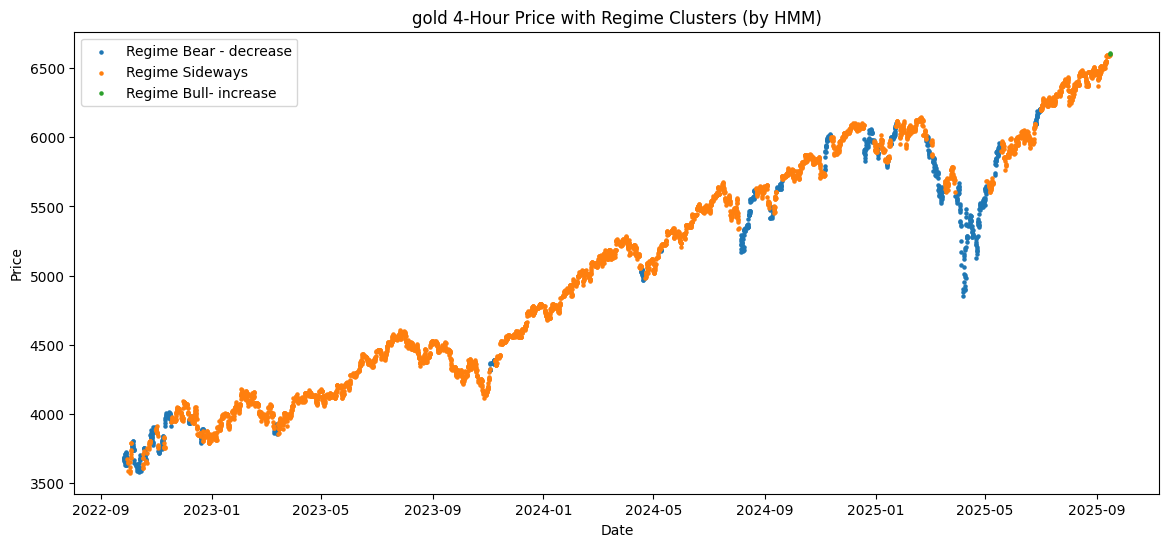

In [17]:
plt.figure(figsize=(14, 6))
# plt.plot(df_hmm['time'], df_hmm['close'], color='gray', label='Close Price')
for regime in df_h4_hmm ['regime_labels'].unique():
    mask = df_h4_hmm ['regime_labels'] == regime
    plt.scatter(df_h4_hmm .index[mask],df_h4_hmm ['close'][mask],
                label=f"Regime {regime}", s=5)
plt.legend()
plt.title("gold 4-Hour Price with Regime Clusters (by HMM)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### Sclop clustering


In [18]:
df_4h

,open,high,low,close,tick_volume,spread,real_volume,volume
time,,,,,,,,
2022-09-16 16:00:00,3859.96,3878.93,3837.55,3878.28,10285,79,0,10285
2022-09-18 20:00:00,3872.15,3882.63,3871.35,3878.62,1579,90,0,1579
2022-09-19 00:00:00,3878.63,3884.13,3859.60,3866.91,4554,84,0,4554
2022-09-19 04:00:00,3866.97,3869.91,3845.95,3846.40,5436,87,0,5436
2022-09-19 08:00:00,3846.68,3854.45,3831.29,3836.60,7000,74,0,7000
...,...,...,...,...,...,...,...,...
2025-09-14 20:00:00,6591.99,6594.38,6587.28,6590.14,1810,35,0,1810
2025-09-15 00:00:00,6590.13,6595.38,6586.92,6593.87,3323,35,0,3323
2025-09-15 04:00:00,6593.88,6603.50,6593.87,6600.75,3843,29,0,3843


In [19]:
window_size = 4
window_size_rolling = 34
slope_cluster, state_labels = regime_detector._train_SlopeCluster(window_size,
                                            window_size_rolling
                                            )
state_labels 

        start_idx  end_idx  start_price  end_price  price_change
regime                                                          
0               0       15      3677.38    3733.80       -114.81
2              16       31      3739.90    3619.92       -183.22
1              32       55      3589.36    3682.42       -458.39


{np.int64(0): 'Bull- increase',
 np.int64(2): 'Sideways',
 np.int64(1): 'Bear - decrease'}

In [20]:
df_4h_slope = regime_detector._regime_SlopeCluster(
                             window_size,
                             window_size_rolling,
                             df_4h,
                             slope_cluster, 
                             state_labels )

In [21]:
df_4h

,open,high,low,close,tick_volume,spread,real_volume,volume
time,,,,,,,,
2022-09-16 16:00:00,3859.96,3878.93,3837.55,3878.28,10285,79,0,10285
2022-09-18 20:00:00,3872.15,3882.63,3871.35,3878.62,1579,90,0,1579
2022-09-19 00:00:00,3878.63,3884.13,3859.60,3866.91,4554,84,0,4554
2022-09-19 04:00:00,3866.97,3869.91,3845.95,3846.40,5436,87,0,5436
2022-09-19 08:00:00,3846.68,3854.45,3831.29,3836.60,7000,74,0,7000
...,...,...,...,...,...,...,...,...
2025-09-14 20:00:00,6591.99,6594.38,6587.28,6590.14,1810,35,0,1810
2025-09-15 00:00:00,6590.13,6595.38,6586.92,6593.87,3323,35,0,3323
2025-09-15 04:00:00,6593.88,6603.50,6593.87,6600.75,3843,29,0,3843


In [22]:
df_4h_slope .head()

,time,open,high,low,close,tick_volume,spread,real_volume,volume,ma,slope,vol_change,regime,regime_labels
0,2022-09-26 20:00:00,3657.35,3668.49,3656.78,3666.09,1707,75,0,1707,3788.097353,-5.752441,-0.881828,1.0,Bear - decrease
1,2022-09-27 00:00:00,3666.20,3686.50,3665.57,3681.52,7200,83,0,7200,3783.536176,-5.314882,3.217926,1.0,Bear - decrease
2,2022-09-27 04:00:00,3681.36,3711.52,3677.55,3706.52,6997,83,0,6997,3778.958235,-4.788824,-0.028194,1.0,Bear - decrease
3,2022-09-27 08:00:00,3706.40,3710.79,3681.82,3706.40,9334,74,0,9334,3773.186471,-4.931059,0.334000,1.0,Bear - decrease
4,2022-09-27 12:00:00,3706.33,3718.53,3654.11,3654.61,15766,77,0,15766,3765.489118,-5.991294,0.689094,1.0,Bear - decrease


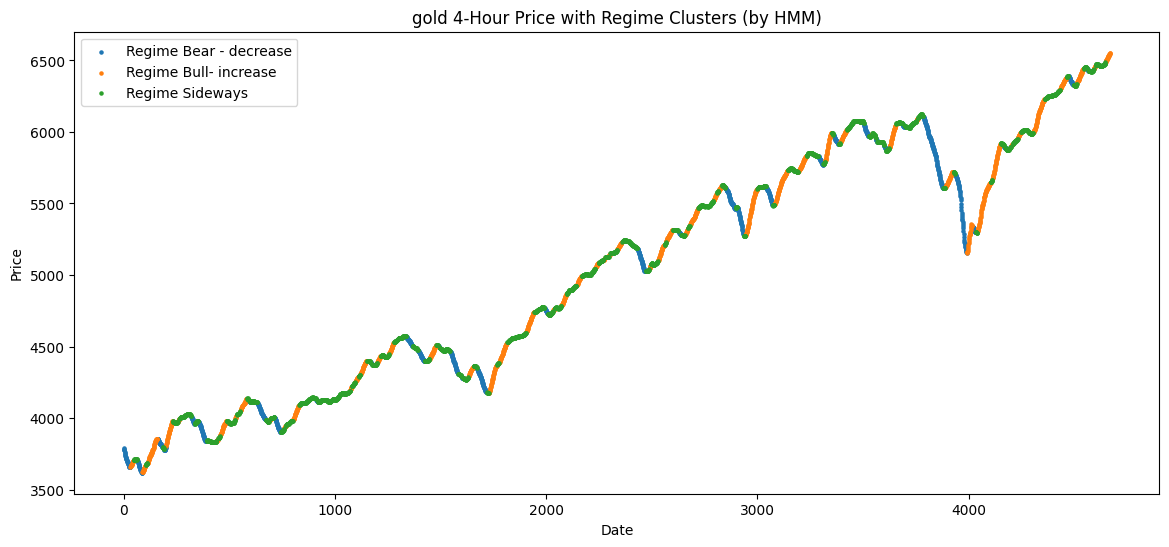

In [23]:
plt.figure(figsize=(14, 6))
# plt.plot(df_hmm['time'], df_hmm['close'], color='gray', label='Close Price')
for regime in sorted(df_4h_slope ['regime_labels'].unique()):
    mask = df_4h_slope['regime_labels'] == regime
    plt.scatter(df_4h_slope .index[mask],df_4h_slope['ma'][mask],
                label=f"Regime {regime}", s=5)
plt.legend()
plt.title("gold 4-Hour Price with Regime Clusters (by HMM)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()

### Coilde_spring

In [24]:
from swing_signal.ma_convergence import CoiledSpringEMAConvergenceStrategy, Dip_Tip_MA_Convergence_H4_to_H1

In [25]:
coile_spring = CoiledSpringEMAConvergenceStrategy()

In [26]:
df_1h, df_4h = coile_spring.detect_convergence(df_1h, df_4h) 

In [27]:
signals = coile_spring.generate_signals (df_1h,df_4h)

In [28]:
import pandas as pd
signals_df = pd.DataFrame(signals, columns=["time", "signal", "signal_price"])

df_1h_csp= df_1h.merge(signals_df, on="time", how="left")

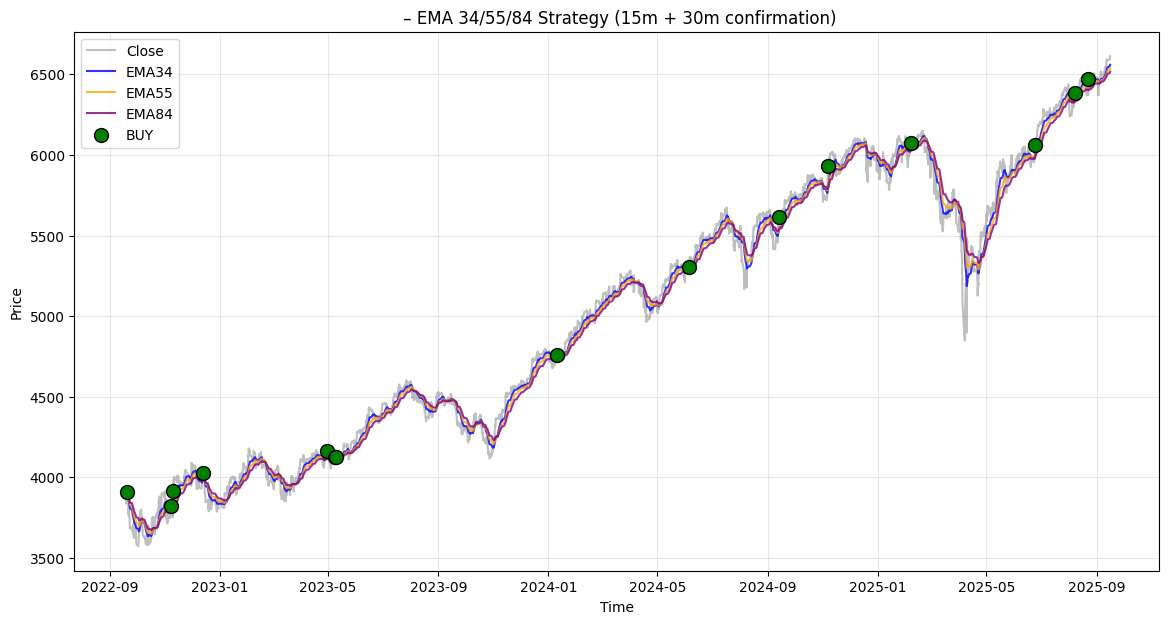

In [29]:
# --------- VẼ BIỂU ĐỒ ---------
plt.figure(figsize=(14, 7))
plt.plot(df_1h.index, df_4h['close'], label='Close', color='gray', alpha=0.5)
plt.plot(df_1h.index, df_4h['EMA34'], label='EMA34', color='blue', alpha=0.8)
plt.plot(df_1h.index, df_4h['EMA55'], label='EMA55', color='orange', alpha=0.8)
plt.plot(df_1h.index, df_4h['EMA84'], label='EMA84', color='purple', alpha=0.8)

# Vẽ tín hiệu BUY/SELL
for t, sig, price in signals:
    color = 'green' if sig == 'BUY' else 'red'
    plt.scatter(t, price, color=color, s=100, label=sig if t == signals[0][0] else "",
                edgecolors='black', zorder=5)

plt.title(f" – EMA 34/55/84 Strategy (15m + 30m confirmation)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


### Dip Tip

In [30]:
# Khởi tạo strategy
dip = Dip_Tip_MA_Convergence_H4_to_H1()

# Sinh tín hiệu H1 dựa trên hội tụ H4
df_dip = dip.generate_signals(df_1h, df_4h)


In [31]:
df_dip 

,open,high,low,close,tick_volume,spread,real_volume,volume,EMA34,EMA55,EMA84,converged,ema_34,ema_55,ema_84,ema_mid,max_ema_gap,ema_converged,signal
time,,,,,,,,,,,,,,,,,,,
2022-09-16 16:00:00,3859.96,3878.93,3837.55,3878.28,10285,79,0,10285,3878.280000,3878.280000,3878.280000,True,3878.280000,3878.280000,3878.280000,3878.280000,0.000000,True,True
2022-09-18 20:00:00,3872.15,3882.63,3871.35,3878.62,1579,90,0,1579,3878.299429,3878.292143,3878.288000,True,3878.299429,3878.292143,3878.288000,3878.293190,0.011429,True,True
2022-09-19 00:00:00,3878.63,3884.13,3859.60,3866.91,4554,84,0,4554,3877.648604,3877.885638,3878.020282,True,3877.648604,3877.885638,3878.020282,3877.851508,0.371678,True,True
2022-09-19 04:00:00,3866.97,3869.91,3845.95,3846.40,5436,87,0,5436,3875.862970,3876.761151,3877.276276,True,3875.862970,3876.761151,3877.276276,3876.633465,1.413306,True,False
2022-09-19 08:00:00,3846.68,3854.45,3831.29,3836.60,7000,74,0,7000,3873.619371,3875.326824,3876.319187,True,3873.619371,3875.326824,3876.319187,3875.088461,2.699816,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-14 20:00:00,6591.99,6594.38,6587.28,6590.14,1810,35,0,1810,6547.892997,6527.006689,6506.372466,True,6547.892997,6527.006689,6506.372466,6527.090717,41.520531,False,False
2025-09-15 00:00:00,6590.13,6595.38,6586.92,6593.87,3323,35,0,3323,6550.520254,6529.394664,6508.431232,True,6550.520254,6529.394664,6508.431232,6529.448717,42.089023,False,False
2025-09-15 04:00:00,6593.88,6603.50,6593.87,6600.75,3843,29,0,3843,6553.390525,6531.943069,6510.603438,True,6553.390525,6531.943069,6510.603438,6531.979011,42.787088,False,False


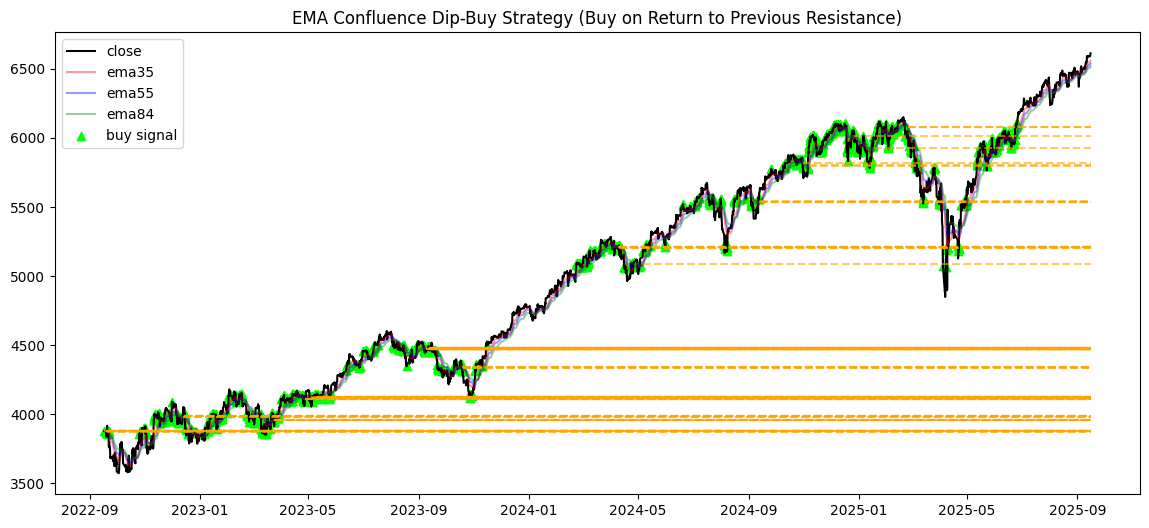

In [32]:

# ---------- Vẽ ----------
plt.figure(figsize=(14,6))
plt.plot(df_dip.index, df_dip["close"], label="close", color="black")
plt.plot(df_dip.index, df_dip["ema_34"], color="red", alpha=0.4, label="ema35")
plt.plot(df_dip.index, df_dip["ema_55"], color="blue", alpha=0.4, label="ema55")
plt.plot(df_dip.index, df_dip["ema_84"], color="green", alpha=0.4, label="ema84")

# Vẽ các đường kháng cự từ hội tụ
for t, row in df_dip.loc[df_dip["ema_converged"], ["ema_mid"]].iterrows():
    plt.hlines(y=row["ema_mid"], xmin=t, xmax=df_dip.index[-1], colors="orange", linestyles="dashed", alpha=0.6)

# Buy signal
plt.scatter(df_dip.index[df_dip["signal"]], df_dip["close"][df_dip["signal"]],
            marker="^", color="lime", label="buy signal")

plt.legend()
plt.title("EMA Confluence Dip-Buy Strategy (Buy on Return to Previous Resistance)")
plt.show()

## Backtest

#### HMM + coilespring

In [33]:
from backtest.backtest import Backtester

Cum return: 1.2066340635955612
Sharpe Ratio: 1.758287502206113


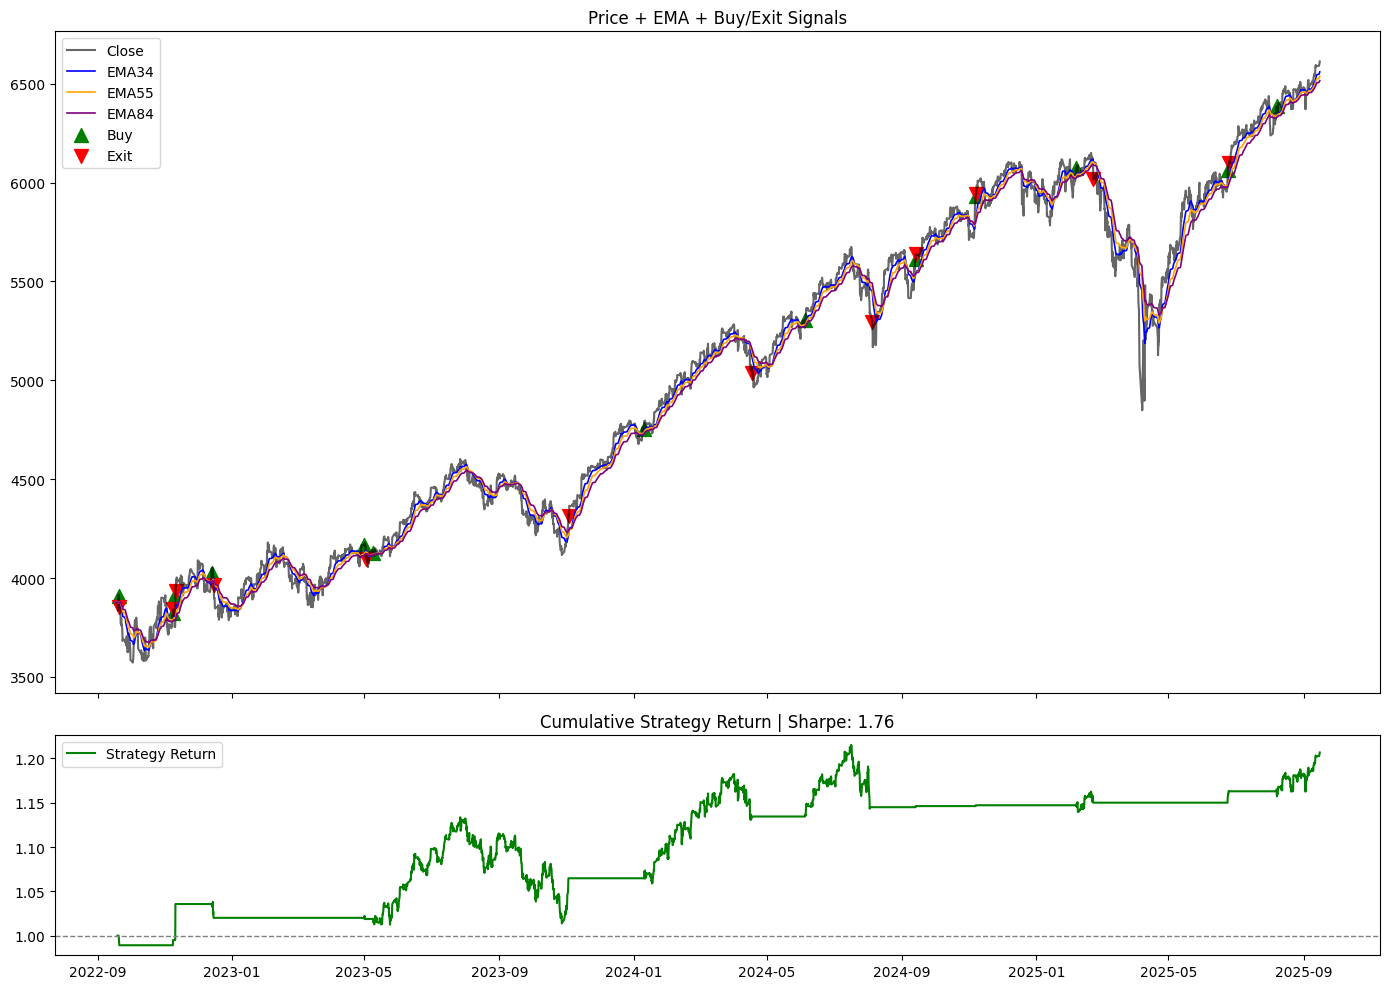

In [34]:
bt = Backtester(df_1h_csp, df_h4_hmm, stoploss=50)
bt.run_backtest()
print("Cum return:", bt.total_return())
print("Sharpe Ratio:", bt.sharpe_ratio())
bt.plot_results()


### slope cluster + coilespring

In [35]:
df_1h_csp.dtypes

time            datetime64[ns]
open                   float64
high                   float64
low                    float64
close                  float64
tick_volume              int64
spread                   int64
real_volume              int64
volume                   int64
EMA34                  float64
EMA55                  float64
EMA84                  float64
converged                 bool
signal                  object
signal_price           float64
dtype: object

In [36]:
df_h4_hmm.dtypes

open             float64
high             float64
low              float64
close            float64
tick_volume        int64
spread             int64
real_volume        int64
volume             int64
return           float64
price_std        float64
vol_change       float64
regime             int64
regime_labels     object
dtype: object

In [37]:
df_4h_slope = df_4h_slope.set_index('time')

Cum return: 1.3193607778129222
Sharpe Ratio: 3.0937361279571403


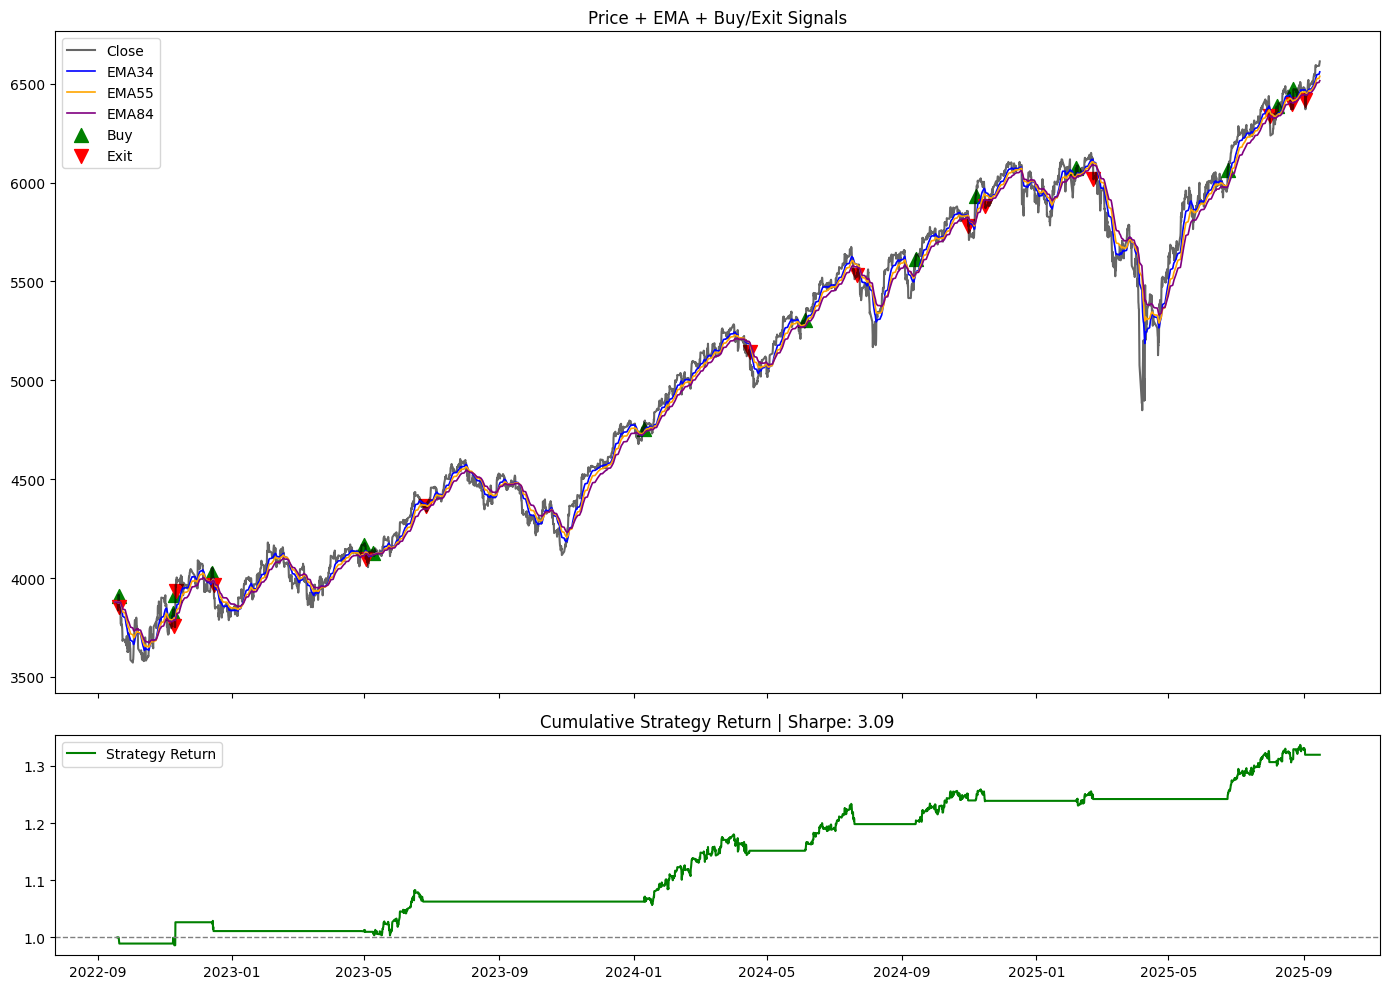

In [38]:
bt = Backtester(df_1h_csp, df_4h_slope, stoploss=50)
bt.run_backtest()
print("Cum return:", bt.total_return())
print("Sharpe Ratio:", bt.sharpe_ratio())
bt.plot_results()


## dip tip + hmm

In [48]:
df_1h_csp

,time,open,high,low,close,tick_volume,spread,real_volume,volume,EMA34,EMA55,EMA84,converged,signal,signal_price
0,2022-09-16 16:00:00,3859.96,3878.93,3837.55,3878.28,10285,79,0,10285,3878.280000,3878.280000,3878.280000,True,NaN,NaN
1,2022-09-18 20:00:00,3872.15,3882.63,3871.35,3878.62,1579,90,0,1579,3878.299429,3878.292143,3878.288000,True,NaN,NaN
2,2022-09-19 00:00:00,3878.63,3884.13,3859.60,3866.91,4554,84,0,4554,3877.648604,3877.885638,3878.020282,True,NaN,NaN
3,2022-09-19 04:00:00,3866.97,3869.91,3845.95,3846.40,5436,87,0,5436,3875.862970,3876.761151,3877.276276,True,NaN,NaN
4,2022-09-19 08:00:00,3846.68,3854.45,3831.29,3836.60,7000,74,0,7000,3873.619371,3875.326824,3876.319187,True,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4702,2025-09-14 20:00:00,6591.99,6594.38,6587.28,6590.14,1810,35,0,1810,6547.892997,6527.006689,6506.372466,True,NaN,NaN
4703,2025-09-15 00:00:00,6590.13,6595.38,6586.92,6593.87,3323,35,0,3323,6550.520254,6529.394664,6508.431232,True,NaN,NaN
4704,2025-09-15 04:00:00,6593.88,6603.50,6593.87,6600.75,3843,29,0,3843,6553.390525,6531.943069,6510.603438,True,NaN,NaN
4705,2025-09-15 08:00:00,6600.85,6604.92,6588.32,6604.46,10502,29,0,10502,6556.308781,6534.532959,6512.811828,True,NaN,NaN


In [49]:
df_dip['signal'] = df_dip['signal'].apply(lambda x: 'BUY' if x == True else x)
df_dip = df_dip.reset_index()

In [50]:
df_h4_hmm

,open,high,low,close,tick_volume,spread,real_volume,volume,return,price_std,vol_change,regime,regime_labels
time,,,,,,,,,,,,,
2022-09-26 04:00:00,3675.44,3704.43,3659.29,3685.36,9590,85,0,9590,0.002658,76.131935,0.072227,2,Bear - decrease
2022-09-26 08:00:00,3685.78,3697.07,3658.34,3672.33,11484,73,0,11484,-0.003536,78.788130,0.197497,2,Bear - decrease
2022-09-26 12:00:00,3672.53,3716.25,3663.91,3682.80,15863,77,0,15863,0.002851,80.402496,0.381313,2,Bear - decrease
2022-09-26 16:00:00,3682.99,3683.33,3644.36,3660.05,14445,78,0,14445,-0.006177,82.932582,-0.089390,2,Bear - decrease
2022-09-26 20:00:00,3657.35,3668.49,3656.78,3666.09,1707,75,0,1707,0.001650,85.175515,-0.881828,2,Bear - decrease
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-14 20:00:00,6591.99,6594.38,6587.28,6590.14,1810,35,0,1810,0.000199,36.938469,-0.502474,1,Sideways
2025-09-15 00:00:00,6590.13,6595.38,6586.92,6593.87,3323,35,0,3323,0.000566,36.772319,0.835912,1,Sideways
2025-09-15 04:00:00,6593.88,6603.50,6593.87,6600.75,3843,29,0,3843,0.001043,36.448918,0.156485,1,Sideways


Cum return: 1.733561064820839
Sharpe Ratio: 3.3033861036717056


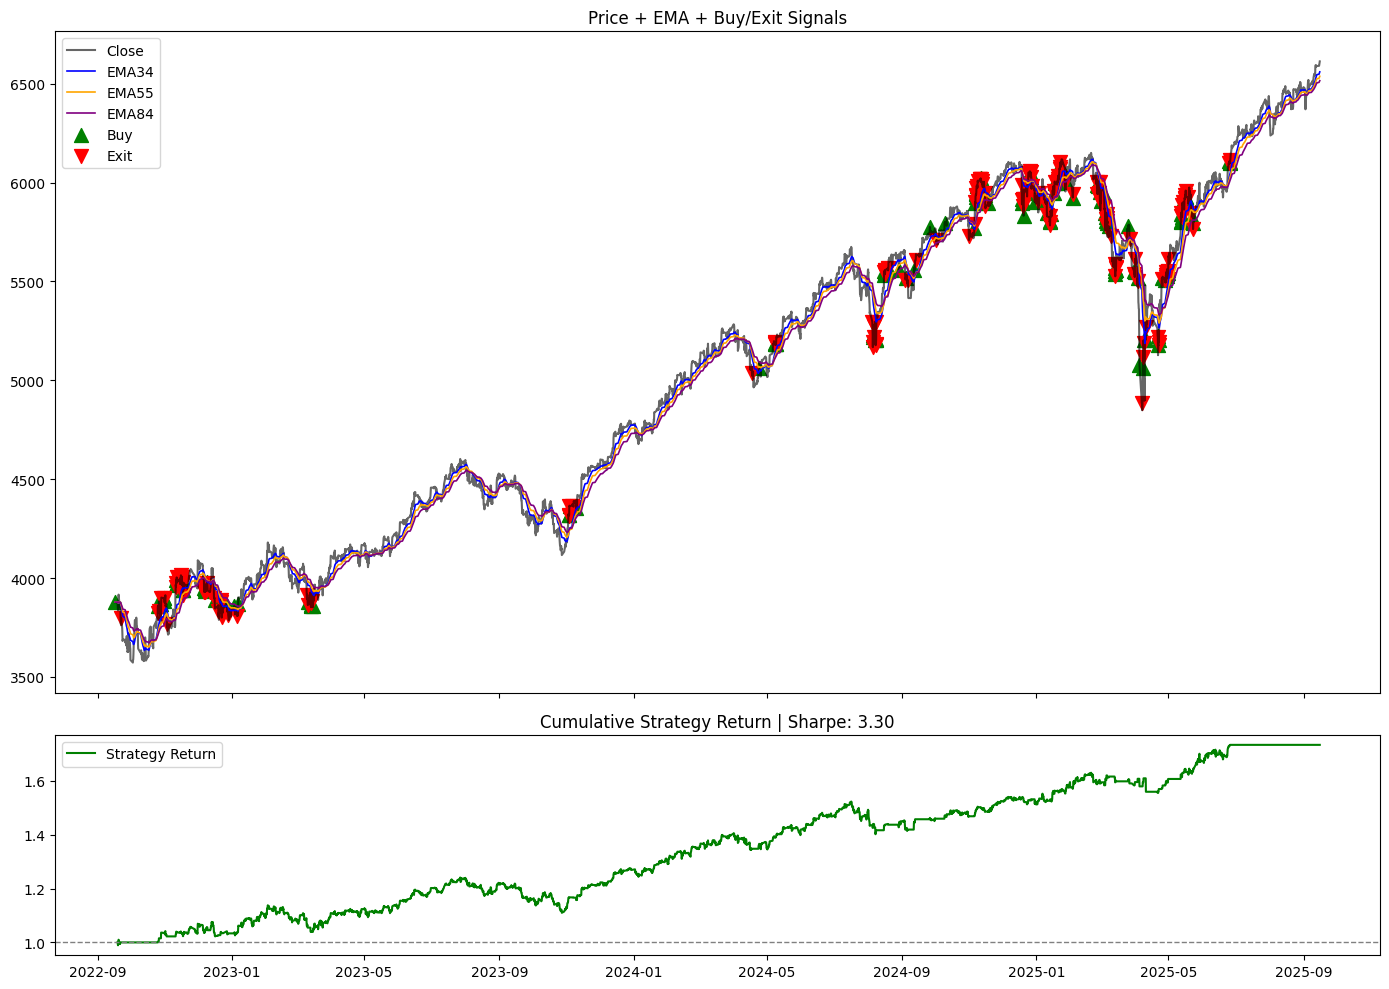

In [51]:
bt = Backtester(df_dip, df_h4_hmm, stoploss=50)
bt.run_backtest()
print("Cum return:", bt.total_return())
print("Sharpe Ratio:", bt.sharpe_ratio())
bt.plot_results()


##### Slop cluter + dip 

Cum return: 1.6398739652605672
Sharpe Ratio: 3.1140241880604065


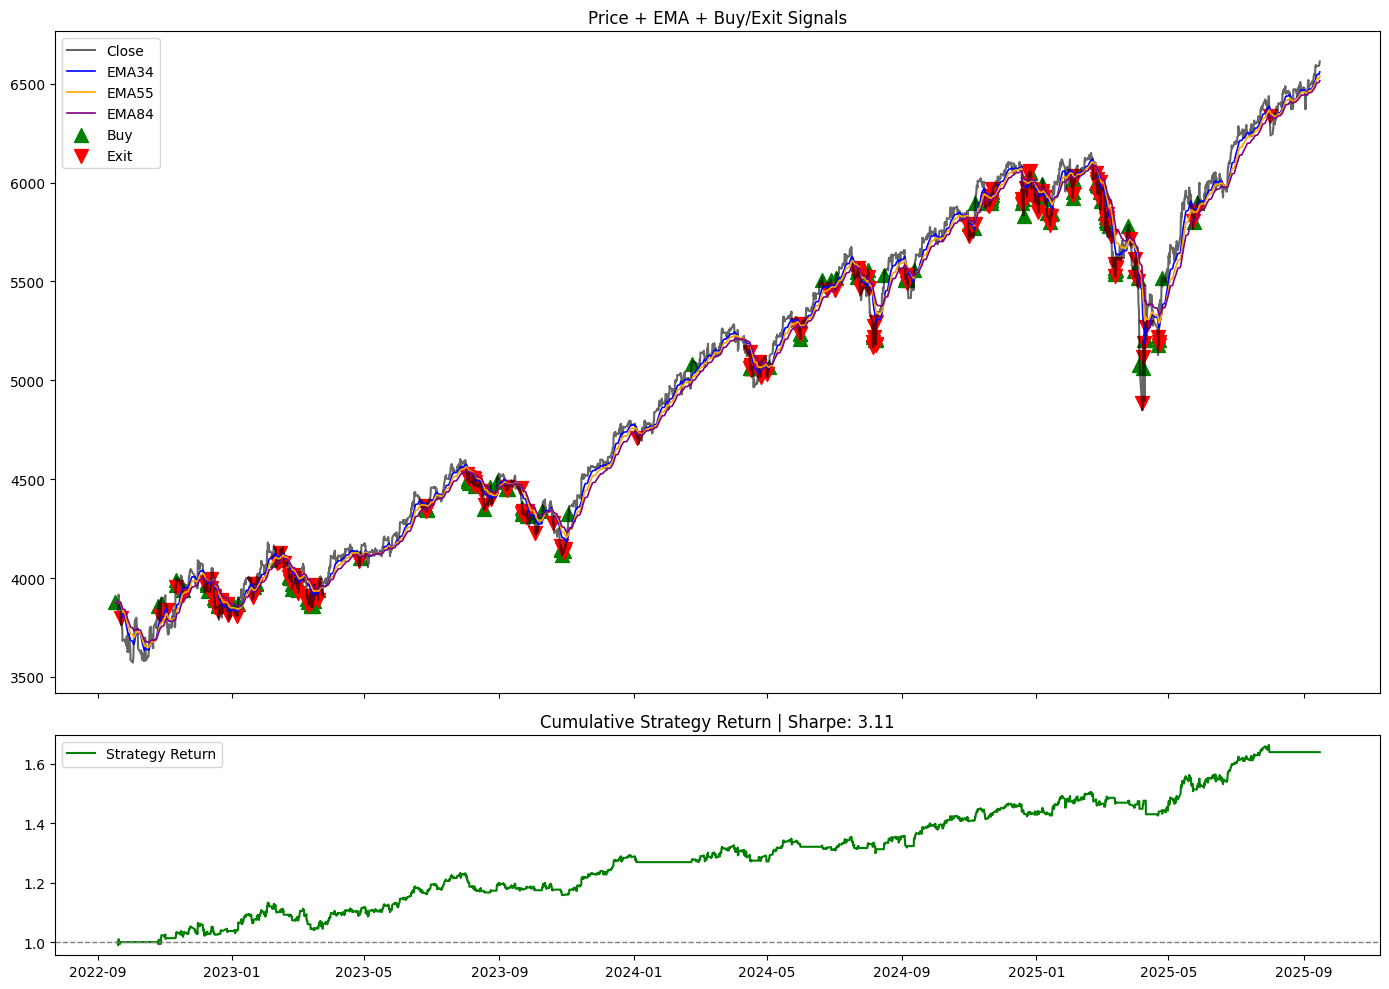

In [52]:
bt = Backtester(df_dip, df_4h_slope, stoploss=50)
bt.run_backtest()
print("Cum return:", bt.total_return())
print("Sharpe Ratio:", bt.sharpe_ratio())
bt.plot_results()


## Reinforcement_Learning

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn.hmm import GaussianHMM

# --- 1. Data Fetching and Feature Engineering ---

# Download 4-hourly SPY data. Note: yfinance has limitations on 4h data,
# typically providing the last ~2 years.
try:
    spy_df = yf.download('SPY', interval='1h', start='2022-01-01', auto_adjust=True)
    # Resample to 4-hourly data
    spy_df = spy_df.resample('4H').agg({
        'Open': 'first',
        'High': 'max',
        'Low': 'min',
        'Close': 'last',
        'Volume': 'sum'
    }).dropna()
    print("Successfully downloaded and resampled 4-hourly SPY data.")
    print(f"Data shape: {spy_df.shape}")
except Exception as e:
    print(f"Could not download data. Error: {e}")
    exit()

# Calculate log returns
spy_df['log_return'] = np.log(spy_df['Close'] / spy_df['Close'].shift(1))

# Calculate volatility (rolling standard deviation of returns)
spy_df['volatility'] = spy_df['log_return'].rolling(window=20).std() * np.sqrt(20)

# Drop missing values created by calculations
spy_df.dropna(inplace=True)

# Prepare the feature matrix for the HMM
# We use log returns and volatility as features to identify regimes
X = spy_df[['log_return', 'volatility']].values

# --- 2. HMM Model Training ---

# Initialize the Gaussian Hidden Markov Model
# n_components=3 for three market regimes (e.g., bull, bear, sideways)
model = GaussianHMM(n_components=3,
                    covariance_type="full", # Allows for more complex relationships
                    n_iter=1000,          # Number of training iterations
                    random_state=42)

# Train the model
model.fit(X)

# Predict the hidden states (the market regimes)
hidden_states = model.predict(X)
spy_df['regime'] = hidden_states

print("\nModel trained. Regime means and covariances:")
print("Means (log_return, volatility):")
print(model.means_)
print("\nCovariances:")
print(model.covars_)

# --- 3. Interpreting and Visualizing the Regimes ---

# Identify regimes by their characteristics (e.g., mean return and volatility)
# This part requires manual interpretation based on the model's output.
# A common approach:
# - High volatility, negative mean return -> Bear market
# - Low volatility, positive mean return -> Bull market
# - Low volatility, near-zero mean return -> Sideways/Ranging market

regime_stats = spy_df.groupby('regime')[['log_return', 'volatility']].mean()
print("\nAverage characteristics per regime:")
print(regime_stats)

# Sort the regimes based on mean log return to assign labels
# (Lowest return = Bear, Highest = Bull)
sorted_regimes = regime_stats.sort_values(by='log_return', ascending=True).index
regime_map = {sorted_regimes[0]: 'Bear', sorted_regimes[1]: 'Sideways', sorted_regimes[2]: 'Bull'}
spy_df['regime_label'] = spy_df['regime'].map(regime_map)

print(f"\nRegime mapping: {regime_map}")


# Plotting the results
sns.set(style='darkgrid')
fig, ax = plt.subplots(figsize=(15, 8))

# Define colors for the regimes
colors = {'Bull': 'lightgreen', 'Sideways': 'khaki', 'Bear': 'lightcoral'}

# Plot the price with colored backgrounds for each regime
for regime, color in colors.items():
    ax.fill_between(spy_df.index,
                    spy_df['Close'].min(),
                    spy_df['Close'].max(),
                    where=spy_df['regime_label'] == regime,
                    facecolor=color,
                    alpha=0.4,
                    label=f'{regime} Regime')

# Plot the SPY closing price on top
ax.plot(spy_df.index, spy_df['Close'], color='navy', label='SPY Close Price', lw=2)

ax.set_title('SPY Market Regimes Detected by HMM (4-Hourly)', fontsize=16)
ax.set_xlabel('Date')
ax.set_ylabel('SPY Close Price')
ax.legend()
plt.show()

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['SPY']: YFPricesMissingError('possibly delisted; no price data found  (1h 2022-01-01 -> 2025-09-14 21:50:52-04:00) (Yahoo error = "1h data not available for startTime=1641013200 and endTime=1757901052. The requested range must be within the last 730 days.")')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_12844\1914231132.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  spy_df = spy_df.resample('4H').agg({


Could not download data. Error: "Column(s) ['Close', 'High', 'Low', 'Open', 'Volume'] do not exist"


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

: 

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
from scipy.optimize import minimize
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# ==============================
# 1) Download SPY data
# ==============================
ticker = "SPY"
start = "2010-01-01"
end   = "2025-09-01"

data = yf.download(ticker, start=start, end=end, interval="1d")
data.columns = [col[0] for col in data.columns]
data = data[['Close']].dropna()
returns = data['Close'].pct_change().dropna()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_12844\742540892.py:15: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start, end=end, interval="1d")
[*********************100%***********************]  1 of 1 completed
